# Data Exploration

## Import

In [1]:
import pandas as pd # For handling and analyzing tabular data

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import re # For validating and manipulating text
import numpy as np # For numeric calculation

## Read data from CSV file

In [2]:
version = '23112024'
anime_data = pd.read_csv(f'./data/anime_data_{version}.csv')

# Check dataset
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5590,16613,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5956,15094,Studio Deen,pg_13
2,520,Marmalade Boy Movie,NaN,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5082,11647,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
4076,53876,Pokemon (2023),Pokémon Horizons: The Series,tv,currently_airing,Spring 2023,"Action, Adventure, Comedy, Fantasy, Kids",7.40,7542,33947,OLM,pg
4077,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
4078,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


## Basic column exploration

### Column names

In [3]:
column_names = anime_data.columns # Get column names
column_names

Index(['ID', 'Title', 'Alternative Title (en)', 'Media Type', 'Status',
       'Premiered Season', 'Genres', 'User Score', 'Number of Ratings',
       'Number of Members', 'Studios', 'Rating'],
      dtype='object')

### Column meanings
- **ID**: A unique identifier for each anime entry in the dataset. It helps to distinguish individual anime records.
- **Title**: The main title of the anime (usually in the original language or its official English title).
- **Alternative Title (en)**: The alternative English title for the anime, if available. It could be a localized or translated title.
- **Media Type**: The format of the anime, e.g., ```tv``` for television series or ```movie``` for feature films.
- **Status**: The airing or release status of the anime (```finished_airing``` or ```currently_airing```).
- **Premiered Season**: Indicates the season and year when the anime premiered, e.g., ```Winter 2024```, ```Spring 1995```.
- **Genres**: A list of genres describing the anime’s theme or content.
- **User Score**: The average score given by users to the anime, typically on a scale of 0 to 10, often with two decimal places. It reflects how well the anime is rated.
- **Number of Ratings**: The number of user ratings the anime has received. This indicates how many people have participated in scoring the anime.
- **Number of Members**: The total number of users showing interest in the anime. It provides a measure of the anime’s popularity.
- **Studios**: The production studios that created the anime. Multiple studios may collaborate on a single anime, and their names are listed here.
- **Rating**: The content rating of the anime based on the MPAA system (e.g., G, PG-13, R, etc.). This indicates the target audience and age restrictions, if any.

### Data type of columns

In [4]:
column_types = anime_data.dtypes # Get data type of columns
column_types

ID                          int64
Title                      object
Alternative Title (en)     object
Media Type                 object
Status                     object
Premiered Season           object
Genres                     object
User Score                float64
Number of Ratings           int64
Number of Members           int64
Studios                    object
Rating                     object
dtype: object

### Comments
-

## Preprocessing

### Check for missing items
- **Purpose**:

In [5]:
missing_values = anime_data.isnull().sum() # Check for null ('N/A', NaN) and empty

print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                          0
Title                       0
Alternative Title (en)    613
Media Type                  0
Status                      0
Premiered Season            0
Genres                      0
User Score                  0
Number of Ratings           0
Number of Members           0
Studios                     5
Rating                      0
dtype: int64


#### Identify columns with missing items:




In [6]:
columns_with_missing = anime_data.columns[anime_data.isnull().any()] # Extract columns with missing values
columns_with_missing

Index(['Alternative Title (en)', 'Studios'], dtype='object')

#### Check missing items by column

In [7]:
def check_missing_for_column(column):
    rows_with_missing = anime_data[anime_data[column].isnull()]

    # Extract rows with missing data in a specific column
    result = rows_with_missing[['ID', 'Title', column]]

    print(f"Rows with missing values in column: {column}")
    print(result)

##### Column 'Alternative Title (en)'
- Extract rows with missing items:

In [8]:
check_missing_for_column('Alternative Title (en)') # Extract rows with missing values in column 'Alternative Title (en)'

Rows with missing values in column: Alternative Title (en)
         ID                             Title Alternative Title (en)
2       520               Marmalade Boy Movie                    NaN
15     1397                         Macross 7                    NaN
16     1674                 Captain Tsubasa J                    NaN
26     1674                 Captain Tsubasa J                    NaN
34     1397                         Macross 7                    NaN
...     ...                               ...                    ...
3980   8687                   Doraemon (2005)                    NaN
4005  54829  Urusei Yatsura (2022) 2nd Season                    NaN
4007  55102                    Girls Band Cry                    NaN
4042   8687                   Doraemon (2005)                    NaN
4048   8687                   Doraemon (2005)                    NaN

[613 rows x 3 columns]


$\rightarrow$ **Solution**: Fill in 'None' for the missing values.



In [9]:
anime_data['Alternative Title (en)'] = anime_data['Alternative Title (en)'].fillna('None') # Fill in 'None' for the missing values

- Re-checking:

In [10]:
check_missing_for_column('Alternative Title (en)')

Rows with missing values in column: Alternative Title (en)
Empty DataFrame
Columns: [ID, Title, Alternative Title (en)]
Index: []


##### Column 'Studios'
- Extract rows with missing items:

In [11]:
check_missing_for_column('Studios') # Extract rows with missing values in column 'Studios'

Rows with missing values in column: Studios
        ID           Title Studios
369   3914     1001 Nights     NaN
989    548  Wonderful Days     NaN
1623  6609      Pucca (TV)     NaN
1631  6609      Pucca (TV)     NaN
2054  3087       Cencoroll     NaN


$\rightarrow$ **Solution**: Fill in 'Unknown' for the missing values.

In [12]:
anime_data['Studios'] = anime_data['Studios'].fillna('Unknown') # Fill in 'Unknown' for the missing values

- Re-checking:

In [13]:
check_missing_for_column('Studios')

Rows with missing values in column: Studios
Empty DataFrame
Columns: [ID, Title, Studios]
Index: []


#### Re-checking for all columns

In [14]:
missing_values = anime_data.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                        0
Title                     0
Alternative Title (en)    0
Media Type                0
Status                    0
Premiered Season          0
Genres                    0
User Score                0
Number of Ratings         0
Number of Members         0
Studios                   0
Rating                    0
dtype: int64


### Check for non-standard items
- **Purpose**:
- **Solution**: Delete the rows containing values that do not match the standard structure of the columns.




#### Validation functions

**Standard structure** of each column:
- ID: A single integer number (No leading zero, for example, 0109 is not permitted).
- Title and Alternative Title (en): No constraint.
- Media type: Only 'tv' or 'movie' (lowercase).
- Status: Only 'finished_airing' or 'currently_airing' (lowercase).
- Premiered season: 'Season' + Year, for example: 'Winter 2024'.
- Genres: No excluded genres.
- User score: A single float number (rounded up to 2 decimal places), not less than 0 and not greater than 10.
- Number of Ratings: A single integer number, greater than 5000.
- Number of Members: A single integer number, greater than 10000.
- Studios: No constraint.
- Rating: Follow MPAA (Motion Picture Association of America, [reference here](https://myanimelist.net/info.php?go=mpaa)) system (lowercase).

In [15]:
# Define validation functions for each column
def validate_id(value):
    return isinstance(value, int) and not str(value).startswith('0')

def validate_media_type(value):
    return value.lower() in ['tv', 'movie']

def validate_status(value):
    return value.lower() in ['finished_airing', 'currently_airing']

def validate_premiered_season(value):
    return re.match(r'^(Winter|Spring|Summer|Fall) \d{4}$', value) is not None

def validate_genres(value, excluded_genres=['hentai']):
    genres = value.split(', ')
    return all(genre.lower() not in excluded_genres for genre in genres)

def validate_user_score(value):
    return isinstance(value, float) and 0.0 <= value <= 10.0

def validate_number_of_ratings(value):
    return isinstance(value, int) and value >= 5000

def validate_number_of_members(value):
    return isinstance(value, int) and value >= 10000

def validate_rating(value):
    mpaa_ratings = ['g', 'pg', 'pg_13', 'r', 'r+'] # Exclude final rating standard (please check reference link for this part)
    return value.lower() in mpaa_ratings


#### Validate and exclude incorrect rows 

In [16]:
# Apply validations and keep only valid rows
anime_data = anime_data[
    anime_data['ID'].apply(validate_id) &
    anime_data['Media Type'].apply(validate_media_type) &
    anime_data['Status'].apply(validate_status) &
    anime_data['Premiered Season'].apply(validate_premiered_season) &
    anime_data['Genres'].apply(validate_genres) &
    anime_data['User Score'].apply(validate_user_score) &
    anime_data['Number of Ratings'].apply(validate_number_of_ratings) &
    anime_data['Number of Members'].apply(validate_number_of_members) &
    anime_data['Rating'].apply(validate_rating)
]

# Check dataset
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5590,16613,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5956,15094,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5082,11647,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
4076,53876,Pokemon (2023),Pokémon Horizons: The Series,tv,currently_airing,Spring 2023,"Action, Adventure, Comedy, Fantasy, Kids",7.40,7542,33947,OLM,pg
4077,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
4078,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


### Check for duplicated rows
- **Purpose**:

In [17]:
duplicates = anime_data.duplicated() # Find duplicated rows
num_duplicates = duplicates.sum() # Get the number of duplicated rows

print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 1930


- Remove duplicated rows:

In [18]:
anime_data = anime_data.drop_duplicates() # Remove duplicated rows
anime_data = anime_data.reset_index(drop=True) # Fix indices

anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5590,16613,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5956,15094,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5082,11647,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


- **Conclusion**: The dataset remains sufficiently **large (>=1000 samples)** after removing duplicate rows $\rightarrow$ The dataset is still **valid**.

### Sort dataset
- Sort dataset by column **'Premiered Season'**
- **Purpose**:

In [19]:
# Define a custom order for seasons
season_order = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

# Extract the season and year from the "Premiered Season" column
anime_data['Season Name'] = anime_data['Premiered Season'].str.split().str[0]
anime_data['Year'] = anime_data['Premiered Season'].str.split().str[1].astype(int)

anime_data = anime_data.sort_values(
    by=['Year', 'Season Name'],
    key=lambda col: col.map(season_order) if col.name == 'Season Name' else col
)

anime_data = anime_data.drop(columns=['Season Name', 'Year'])

# Reset the index after sorting
anime_data = anime_data.reset_index(drop=True)

anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


### Save the cleaned dataset to CSV file

In [20]:
# Save cleaned dataset
anime_data.to_csv('./data/anime_data_cleaned.csv', index=False)

## Statistics
- **Purpose**:

### Read cleaned data from CSV file

In [21]:
anime_data = pd.read_csv('./data/anime_data_cleaned.csv')

# Check dataset
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


### Correlation matrix (for numerical data columns)
- **Purpose**:

In [22]:
# Compute the correlation matrix for numeric columns
correlation_matrix = anime_data.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         ID  User Score  Number of Ratings  Number of Members
ID                 1.000000    0.246411           0.092766           0.111424
User Score         0.246411    1.000000           0.412601           0.443590
Number of Ratings  0.092766    0.412601           1.000000           0.990175
Number of Members  0.111424    0.443590           0.990175           1.000000


#### Visualization

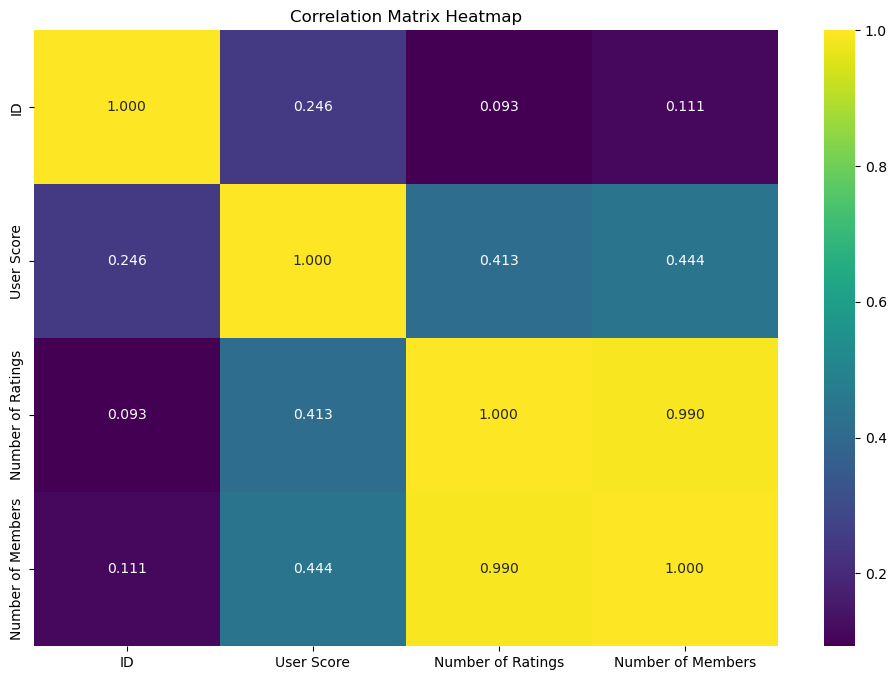

In [23]:
# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='viridis') # Customization
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Comments

- **ID:** Weak correlation with all other variables (values close to 0):    
    - User Score: 0.251 (low positive correlation).
    - Number of Ratings: 0.094 (very weak correlation).
    - Number of Members: 0.112 (very weak correlation).

$\rightarrow$ The ID column is likely just a unique identifier and does not contribute significantly to meaningful relationships.
- **User Score:** Moderate positive correlation with:
    - Number of Ratings: 0.413.
    - Number of Members: 0.444.

$\rightarrow$ Higher User Scores tend to be associated with a moderate increase in the number of ratings and members, but the relationship is not strong.
- **Number of Ratings** and **Number of Members** have strong positive correlation (0.990).

$\rightarrow$ It suggests that anime with a high number of ratings also tend to have a high number of members. This relationship is intuitive as more popular anime are likely to be rated by a larger audience.

#### Conclusion

- The **ID** column does not show significant correlations with other columns, indicating that it serves as an identifier rather than a meaningful feature (apparently).
- **Number of Ratings** and **Number of Members** are highly correlated. This indicates that these features are closely related, reflecting the anime's overall popularity.
- **User Score** has a moderate relationship with both **Number of Ratings** and **Number of Members**, suggesting that popular anime tend to have slightly higher user scores.

### Distribution
- **Purpose**:
- We will skip column **ID**, **Title**, and **Alternative Title (en)** (it makes no sense to get the distribution of these columns).

#### Column 'Media Type'

In [24]:
value_counts = anime_data['Media Type'].value_counts()

# Show distribution
print('Value distribution for column: Media Type')
print(value_counts)

Value distribution for column: Media Type
tv       1668
movie     482
Name: Media Type, dtype: int64


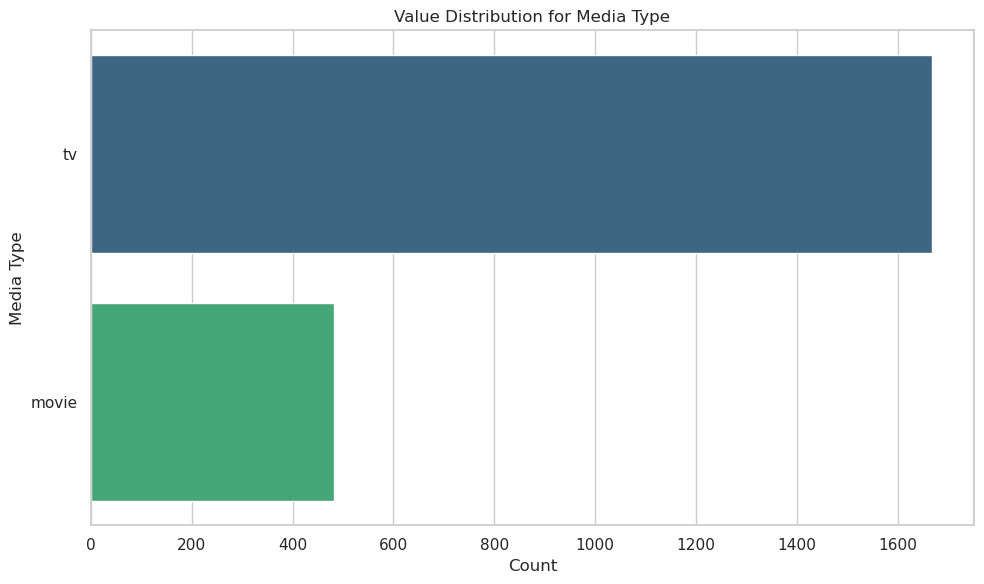

In [25]:
# Visualize
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x=value_counts.values,
    y=value_counts.index,
    palette='viridis',
    hue=value_counts.index,
    legend=False
)
plt.title("Value Distribution for Media Type")
plt.xlabel("Count")
plt.ylabel("Media Type")

plt.tight_layout()
plt.show()

#### Column 'Status'

In [26]:
value_counts = anime_data['Status'].value_counts()

# Show distribution
print('Value distribution for column: Status')
print(value_counts)

Value distribution for column: Status
finished_airing     2115
currently_airing      35
Name: Status, dtype: int64


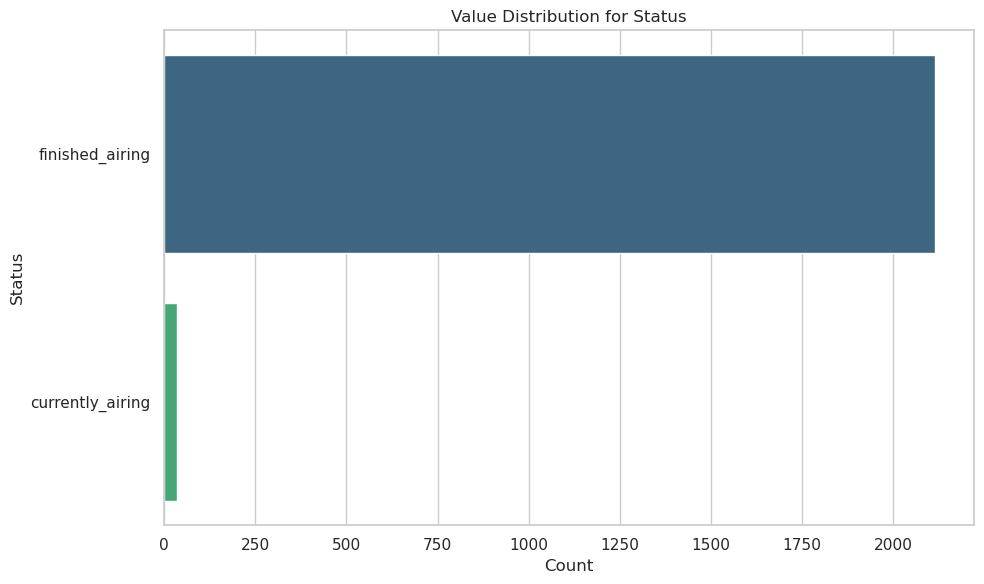

In [27]:
# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(
    x=value_counts.values,
    y=value_counts.index,
    palette='viridis',
    hue=value_counts.index,
    legend=False
)
plt.title("Value Distribution for Status")
plt.xlabel("Count")
plt.ylabel("Status")

plt.tight_layout()
plt.show()

#### Column 'Premiered Season'
- With this column, we will use Line chart for visualization, because of the large size of value set.

In [28]:
premiered_counts = anime_data['Premiered Season'].value_counts()

print('Value distribution for column: Premiered Season')
print(value_counts)

Value distribution for column: Premiered Season
finished_airing     2115
currently_airing      35
Name: Status, dtype: int64


In [29]:
# Preprocessing
def season_to_datetime(season):
    season_map = {'Winter': 1, 'Spring': 4, 'Summer': 7, 'Fall': 10}
    season_name, year = season.split()
    return pd.Timestamp(year=int(year), month=season_map[season_name], day=1)

# Sort Premiered Season by time order
premiered_counts = premiered_counts.rename_axis('Premiered Season').reset_index(name='Count')
premiered_counts['Date'] = premiered_counts['Premiered Season'].apply(season_to_datetime)
premiered_counts = premiered_counts.sort_values('Date')

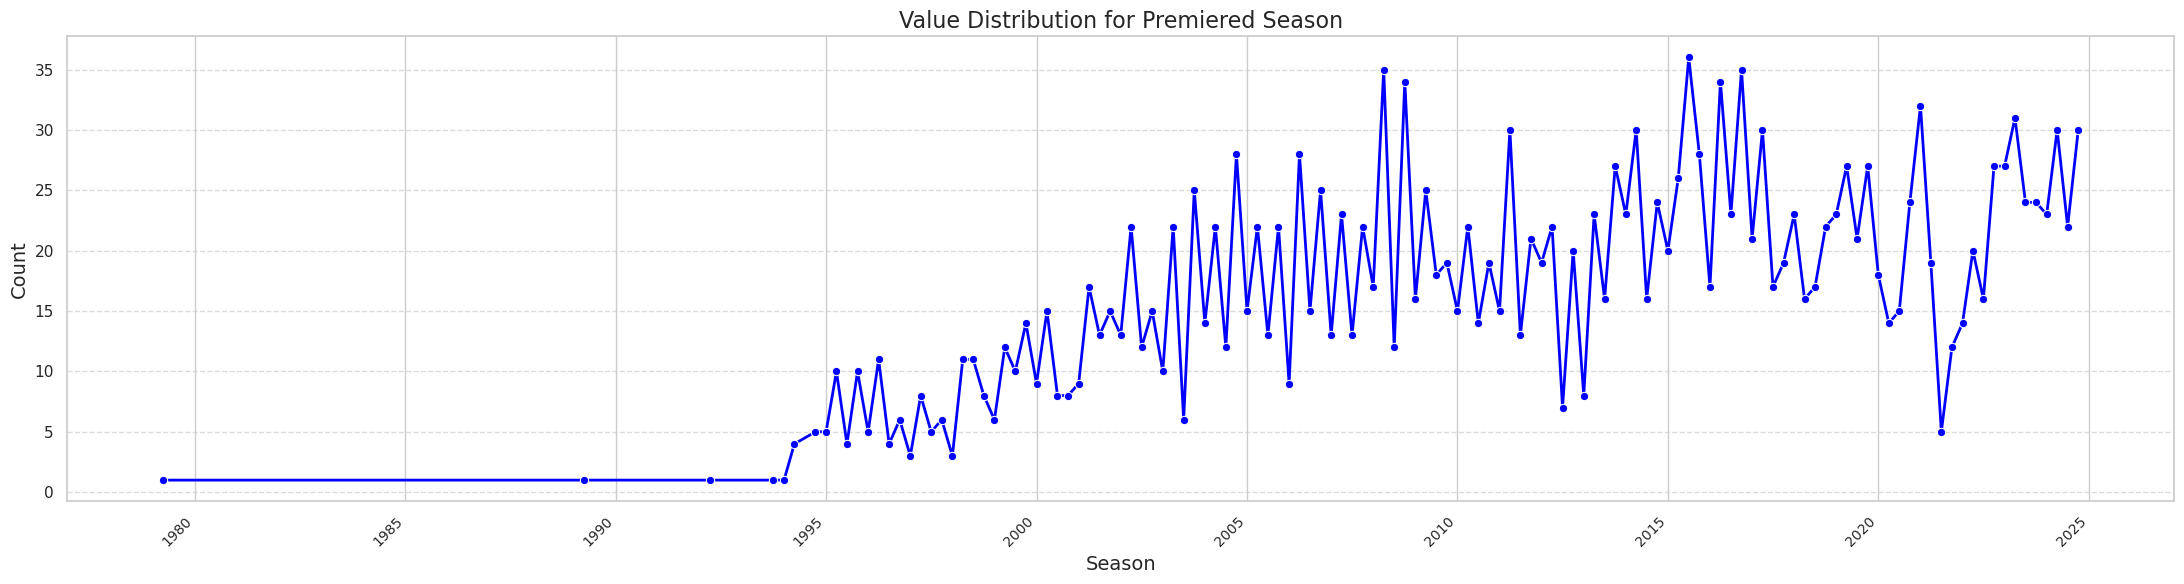

In [30]:
# Visualize
plt.figure(figsize=(22, 6))
sns.lineplot(
    x='Date',
    y='Count',
    data=premiered_counts,
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Value Distribution for Premiered Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Column 'Genres'
- With this column, we only consider included genres (check the list below).

In [31]:
# Included genres list
included_genres = [
    'action', 'adventure', 'comedy', 'drama', 'fantasy',
    'mystery', 'romance', 'sci-fi', 'slice of life', 'sports'
]

In [32]:
value_counts = (
    anime_data['Genres']
    .str.split(', ')
    .explode()
    .str.lower()
    .value_counts()
    .loc[included_genres]
    .sort_values(ascending=False)
)

# Show distribution
print('Value distribution for column: Genres')
print(value_counts)

Value distribution for column: Genres
action           912
comedy           750
fantasy          616
drama            599
adventure        539
romance          472
sci-fi           449
mystery          257
slice of life    129
sports           125
Name: Genres, dtype: int64


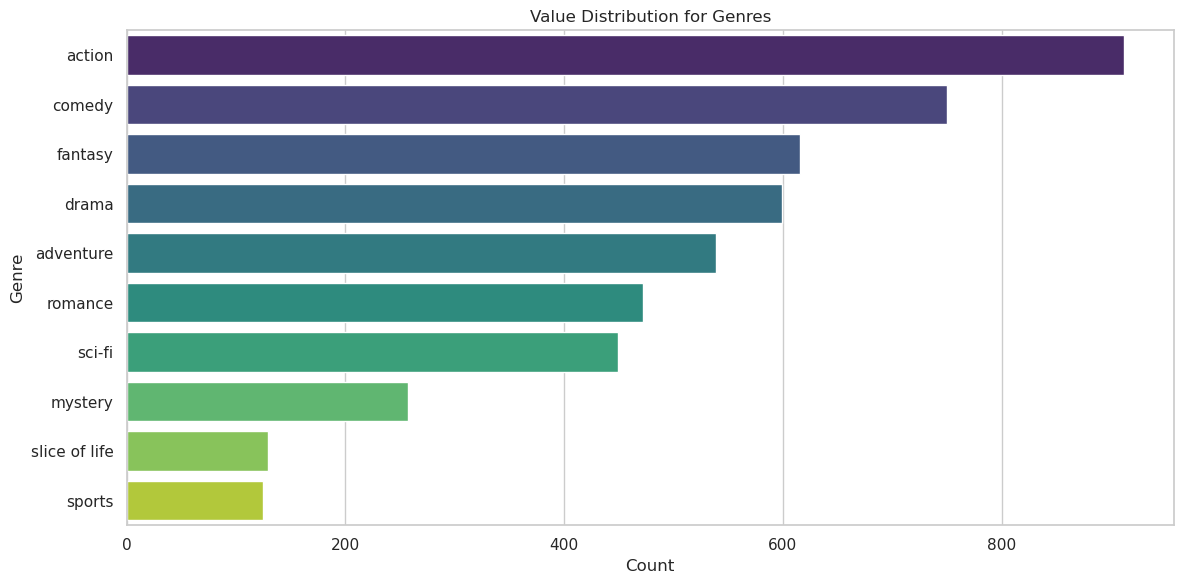

In [33]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    x=value_counts.values,
    y=value_counts.index,
    palette='viridis',
    hue=value_counts.index,  # Assign y to hue
    legend=False  # Suppress legend
)
plt.title("Value Distribution for Genres")
plt.xlabel("Count")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

#### Column 'User Score'
- With this column, we will apply basic statistics and visualize its distribution (approximately).
- Calculate these following metrics:
    - Mean.
    - Median.
    - Mode.
    - Min and Max (Range).
    - First quartile (Q1).
    - Third quartile (Q3).
- Draw the distribution using a histogram and overlay a kernel density estimation (KDE, [reference here](https://en.wikipedia.org/wiki/Kernel_density_estimation)) curve.

In [34]:
user_scores = anime_data['User Score']

# Calculate statistics
mean_score = user_scores.mean()
median_score = user_scores.median()
mode_score = user_scores.mode()[0] # In this case, mode has only one
# Range
max_score = user_scores.max()
min_score = user_scores.min()
q1 = user_scores.quantile(0.25)  # First Quartile (Q1)
q3 = user_scores.quantile(0.75)  # Third Quartile (Q3)

# Show the statistics
print("Statistics for User Score:")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Mode: {mode_score:.2f}")
print(f"Min: {min_score:.2f}")
print(f"Max: {max_score:.2f}")
print(f"First Quartile (Q1): {q1:.2f}")
print(f"Third Quartile (Q3): {q3:.2f}")

Statistics for User Score:
Mean: 7.57
Median: 7.55
Mode: 7.53
Min: 5.73
Max: 9.32
First Quartile (Q1): 7.20
Third Quartile (Q3): 7.93


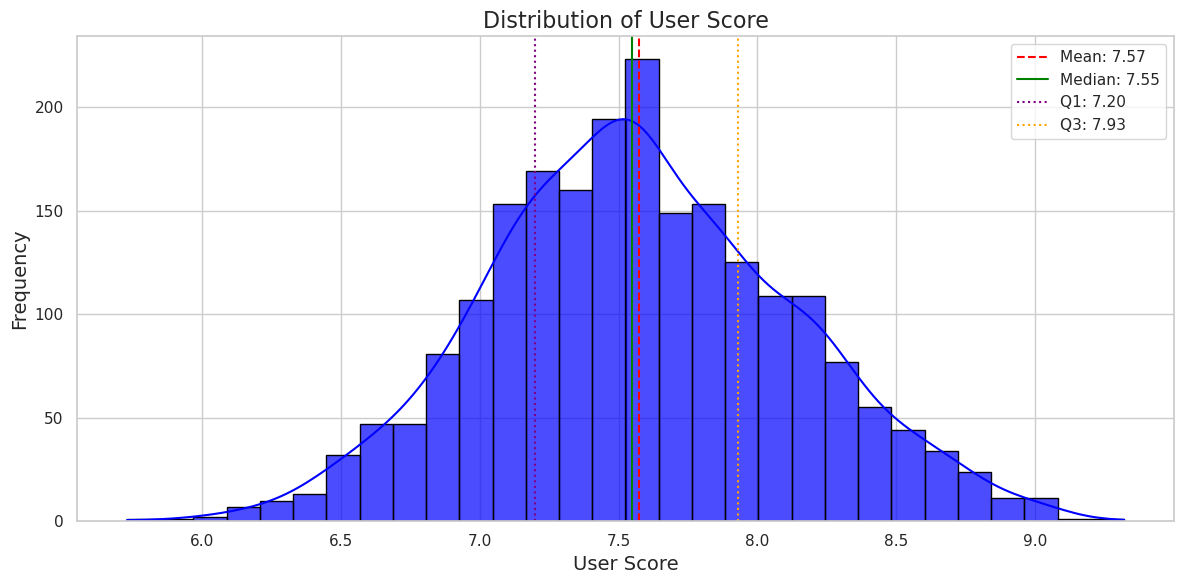

In [35]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(user_scores, kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='-', label=f'Median: {median_score:.2f}')
plt.axvline(q1, color='purple', linestyle=':', label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='orange', linestyle=':', label=f'Q3: {q3:.2f}')
plt.title("Distribution of User Score", fontsize=16)
plt.xlabel("User Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

##### Comments:

- The **mean** (7.57), **median** (7.55), and **mode** (7.53) values are approximately equal.
- The distance between the **first quartile** (7.20) and the **median** (7.55), as well as the **minimum value** (5.73) is approximately equal to the distance between the **third quartile** (7.93) and the **median**, as well as the **maximum value** (9.32).

$\rightarrow$ This distribution is approximately **Normal Distribution** $\rightarrow$ The dataset is highly reliable. 

#### Column 'Number of Ratings'

- With this column, we will only apply basic statistics and not visualize its distribution, because, for this attribute, we only need to roughly capture the number of ratings rather than considering the entire set of values.
- Calculate these following metrics:
    - Mean.
    - Min and Max (Range).

In [36]:
# Calculate statistics
mean_score = anime_data['Number of Ratings'].mean()
# Range
max_score = anime_data['Number of Ratings'].max()
min_score = anime_data['Number of Ratings'].min()

# Show the statistics
print("Statistics for Number of Ratings:")
print(f"Mean: {mean_score:.2f}")
print(f"Min: {min_score:.0f}")
print(f"Max: {max_score:.0f}")

Statistics for Number of Ratings:
Mean: 158248.29
Min: 5001
Max: 2870898


#### Column 'Number of Members'

- Similar to **Number of Ratings** column, we will only apply basic statistics.
- Calculate these following metrics:
    - Mean.
    - Min and Max (Range).

In [37]:
# Calculate statistics
mean_score = anime_data['Number of Members'].mean()
# Range
max_score = anime_data['Number of Members'].max()
min_score = anime_data['Number of Members'].min()

# Show the statistics
print("Statistics for Number of Members:")
print(f"Mean: {mean_score:.2f}")
print(f"Min: {min_score:.0f}")
print(f"Max: {max_score:.0f}")

Statistics for Number of Members:
Mean: 297216.69
Min: 10346
Max: 4065518


#### Column 'Studios'
- With this column, we will extract the top 10 studios that have produced the most anime for visualization.

In [38]:
# Split the Studios column into individual studios and count their occurrences
value_counts = (
    anime_data['Studios']
    .str.split(', ')  
    .explode()
    .value_counts() 
)

print('List of studios by number of anime produced')
print(value_counts)

List of studios by number of anime produced
Toei Animation             114
Madhouse                   111
J.C.Staff                   97
Production I.G              97
Sunrise                     89
                          ... 
Purple Cow Studio Japan      1
Anima                        1
CyberConnect2                1
AIC Classic                  1
Fugaku                       1
Name: Studios, Length: 246, dtype: int64


In [39]:
# Extract the top 10 studios
top_10_studios = value_counts.head(10)
top_10_studios

Toei Animation       114
Madhouse             111
J.C.Staff             97
Production I.G        97
Sunrise               89
TMS Entertainment     84
A-1 Pictures          83
Studio Deen           73
OLM                   65
Pierrot               64
Name: Studios, dtype: int64

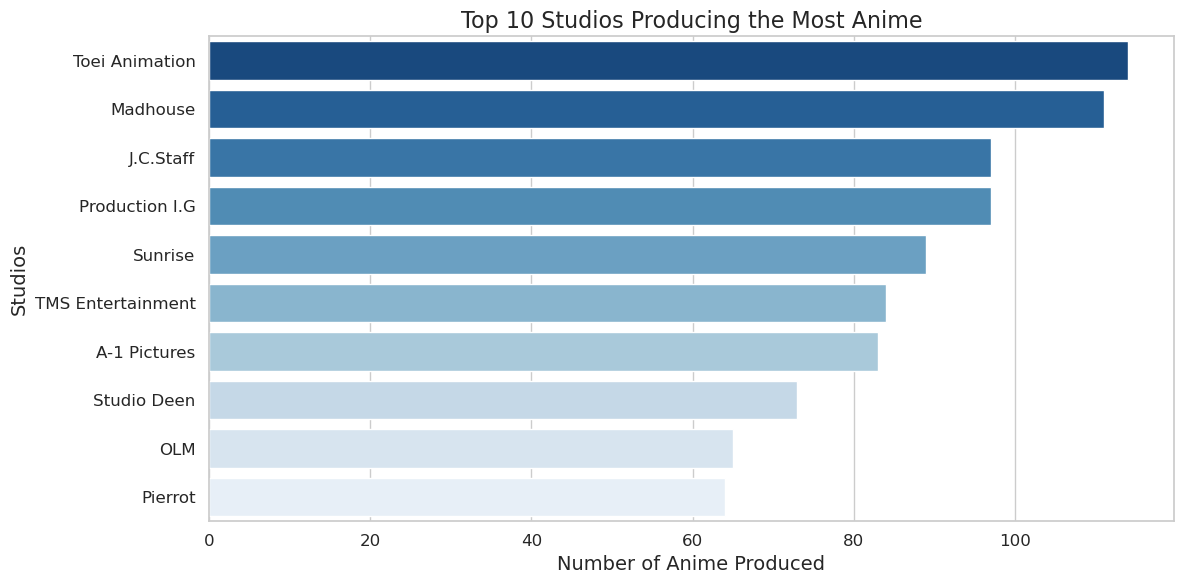

In [40]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_studios.values,
    y=top_10_studios.index,
    palette='Blues_r',
    hue=top_10_studios.index, 
    legend=False
)

plt.title("Top 10 Studios Producing the Most Anime", fontsize=16)
plt.xlabel("Number of Anime Produced", fontsize=14)
plt.ylabel("Studios", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

#### Column 'Rating'

In [41]:
value_counts = anime_data['Rating'].value_counts()

# Show distribution
print('Value distribution for column: Rating')
print(value_counts)

Value distribution for column: Rating
pg_13    1396
r         419
g         121
pg        109
r+        105
Name: Rating, dtype: int64


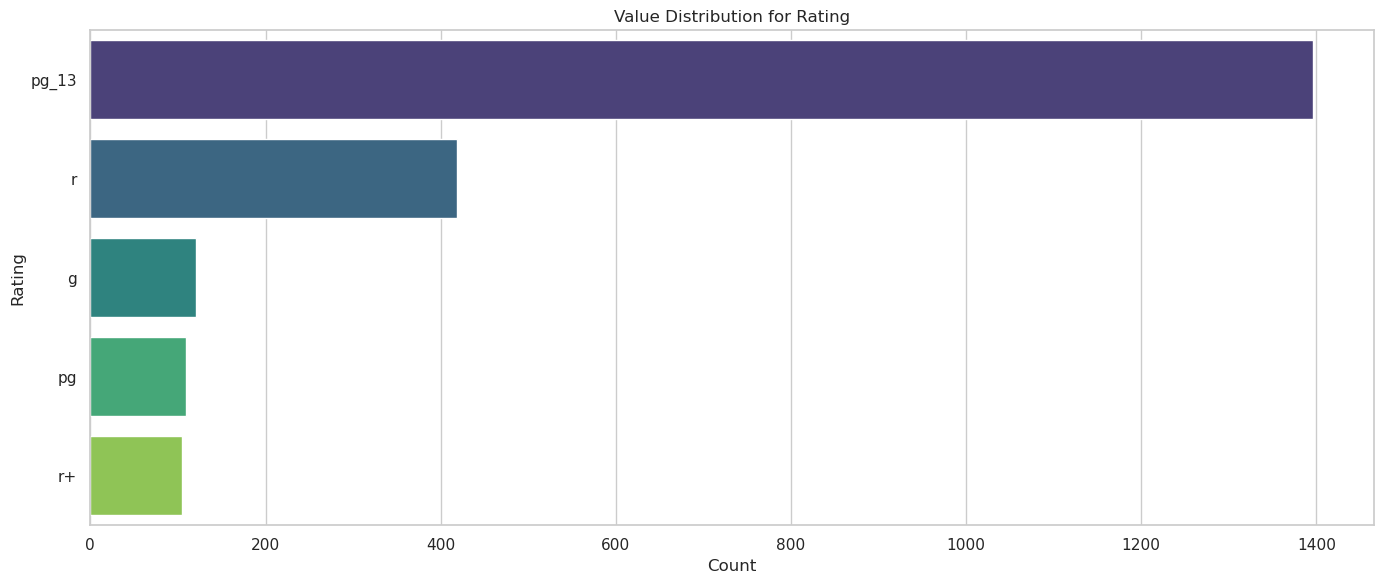

In [42]:
# Visualize
plt.figure(figsize=(14, 6))
sns.barplot(
    x=value_counts.values,
    y=value_counts.index,
    palette='viridis',
    hue=value_counts.index,
    legend=False
)
plt.title("Value Distribution for Rating")
plt.xlabel("Count")
plt.ylabel("Rating")

plt.tight_layout()
plt.show()